## Sec. 3.3 Residual diagnostics


### Fitted values

- $y_1, \cdots, y_{t-1}$ : 관측값
- $\hat{y}_{t|t-1}$ or $\hat{y}_t$ : 관측값 $y_1, \cdots, y_{t-1}$을 이용한 $y_t$의 예측값 <- "적합값(fitted values)"
- "fitted values" vs "true forecasts"


### Residuals

- The “residuals” in a time series model are what is left over after fitting a model.
- 관측값과 대응되는 적합값과 관측값의 차이
$$e_t = y_t-\hat{y}_t$$
- 잔차(residual)는 어떤 모델이 데이터의 정보를 적절하게 잡아냈는지 여부를 확인할 때 유용
- 어떤 모델이 사용할 수 있는 모든 정보를 사용했는지 여부를 확인하기 위해 중요한 것입니다만, 예측 기법을 선택하기 위한 좋은 방법은 아님
- A good forecasting method
    - 잔차(residual)에 상관 관계가 없음.(잔차 사이에 상관관계(correlation)가 있다면, 잔차에 예측값을 계산할 때 사용해야하는 정보가 남아 있는 것)
    - 잔차의 평균이 0. (잔차의 평균이 0이 아니라면, 예측값이 편향(bias)된 것)
    - 차의 분산이 상수
    - 잔차가 정규 분포를 따름


### Examples

In [30]:
import pandas as pd
import datetime
from math import pi
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = 'AppleGothic'

import seaborn as sns
import statsmodels.api as sm

from pylab import rcParams
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

,value
index,
1,392.830017
2,392.512085
3,397.305908
4,398.011322
5,400.490204
...,...
196,523.832947
197,523.226929
198,525.671021


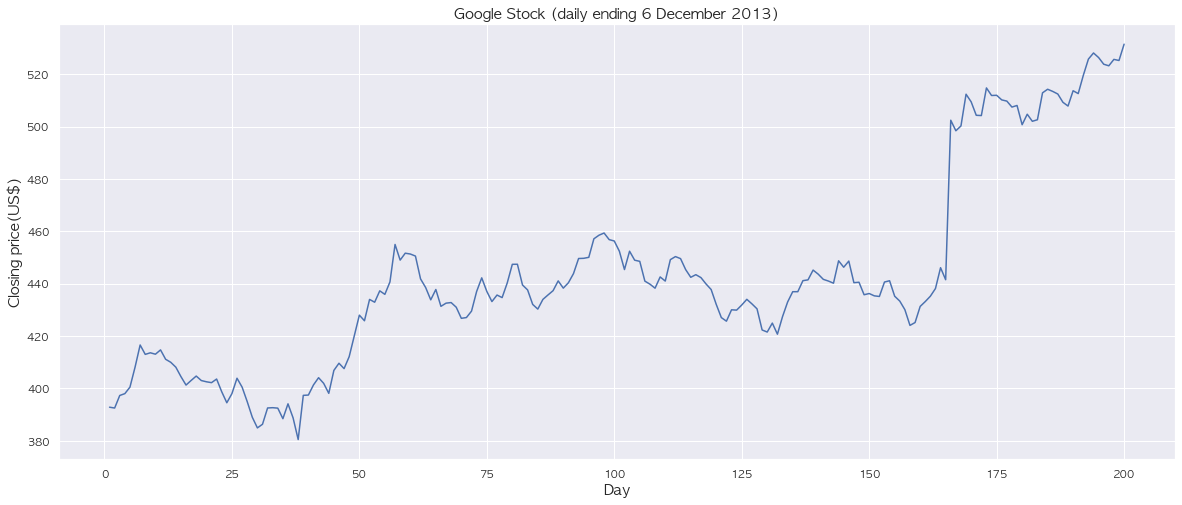

In [79]:
goog = pd.read_csv('../data/googledata.csv').set_index('index')
display(goog)
n = goog.size
fig = plt.subplots(figsize=(20,8))
plt.plot(goog)
plt.xlabel('Day', fontsize=15)
plt.ylabel('Closing price(US$)', fontsize=15)
plt.title('Google Stock (daily ending 6 December 2013)', fontsize=15)
plt.show()

In [80]:
goog['Naive'] = [np.nan] * n
goog['Naive'].loc[2:] = list(goog['value'].loc[1:199])
goog['residuals'] = goog['value']-goog['Naive']
goog

,value,Naive,residuals
index,,,
1,392.830017,NaN,NaN
2,392.512085,392.830017,-0.317932
3,397.305908,392.512085,4.793823
4,398.011322,397.305908,0.705414
5,400.490204,398.011322,2.478882
...,...,...,...
196,523.832947,526.371460,-2.538513
197,523.226929,523.832947,-0.606018
198,525.671021,523.226929,2.444092


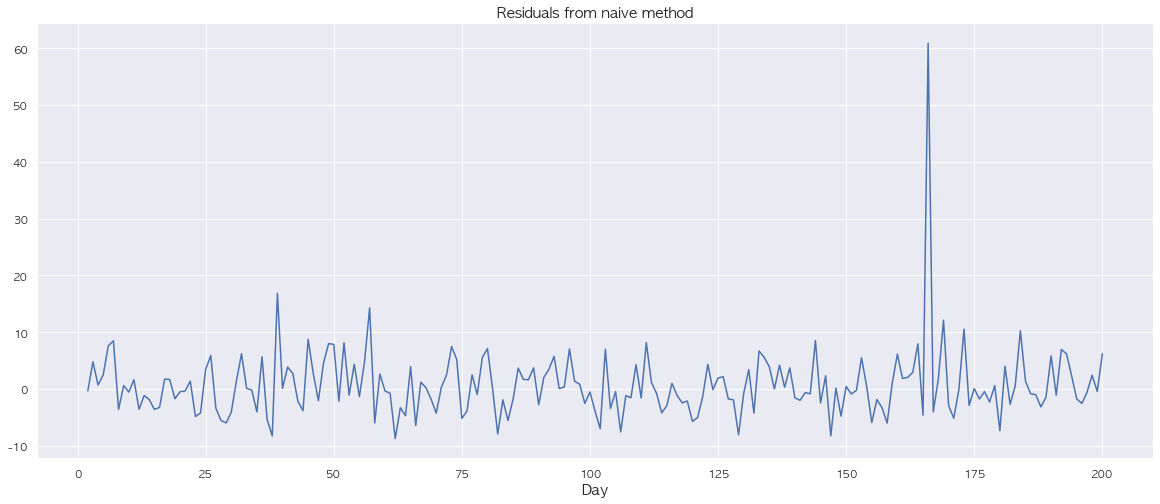

In [81]:
fig = plt.subplots(figsize=(20,8))
plt.plot(goog['residuals'])
plt.xlabel('Day', fontsize=15)
plt.title('Residuals from naive method', fontsize=15)
plt.show()

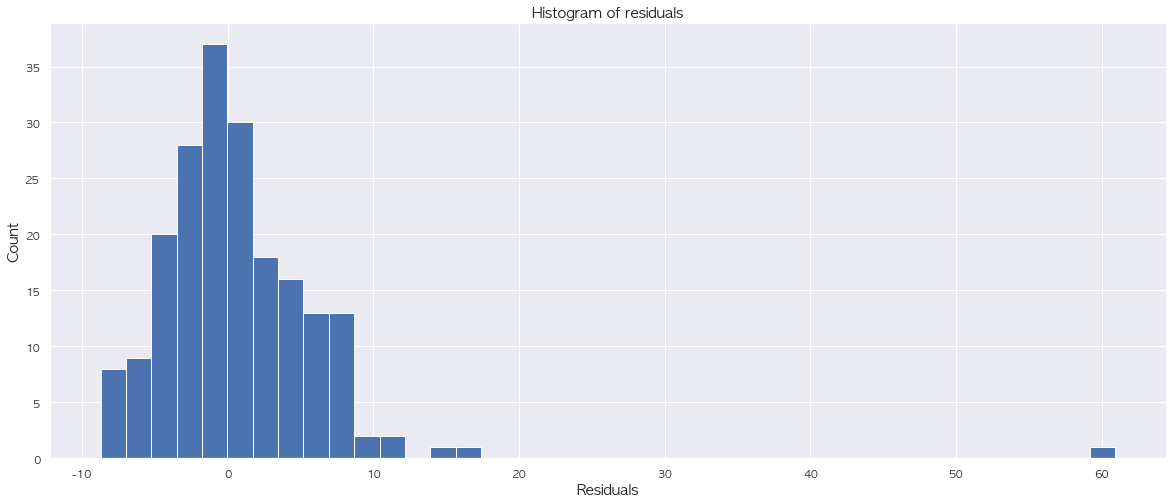

In [87]:
fig = plt.subplots(figsize=(20,8))
plt.hist(goog['residuals'].loc[2:], bins=40)
plt.xlabel('Residuals', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Histogram of residuals', fontsize=15)
plt.show()

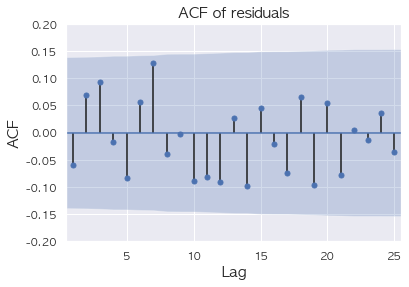

In [94]:
sm.graphics.tsa.plot_acf(np.array(goog['residuals'].loc[2:]), lags=25)
plt.xlim(0.5,25.5)
plt.ylim(-0.2,0.2)
plt.xlabel('Lag', fontsize=15)
plt.ylabel('ACF', fontsize=15)
plt.title('ACF of residuals', fontsize=15)
plt.show()

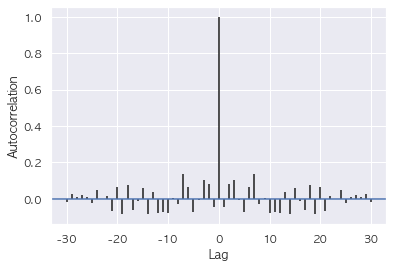

In [95]:
data = np.array(goog['residuals'].loc[2:])
plot.acorr(data, maxlags=30)
plot.xlabel('Lag')
plot.ylabel('Autocorrelation')
plot.show()

### Portmanteau tests for autocorrelation

In [103]:
res = np.array(goog['residuals'].loc[2:])
sm.stats.acorr_ljungbox(res, lags=[10], boxpierce=False)

(array([11.03143556]), array([0.35507413]))

In [102]:
sm.stats.acorr_ljungbox(res, lags=[10], boxpierce=True)

(array([11.03143556]),
 array([0.35507413]),
 array([10.6109502]),
 array([0.38862031]))

Output: 

Ljung-Box

- test statistic

- p-value based on chi-square distribution

Box-Pierce
- test statistic for Box-Pierce test

- p-value based for Box-Pierce test on chi-square distribution